# Предсказание смены работы сотрудником

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [13]:
import warnings
warnings.filterwarnings("ignore")

Загрузим датасет с данными о работниках

In [14]:
df=pd.read_csv("aug_train.csv")
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [15]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,19148,19149,19150,19151,19152,19153,19154,19155,19156,19157
enrollee_id,8949,29725,11561,33241,666,21651,28806,402,27107,699,...,9212,251,32313,11385,29754,7386,31398,24576,5756,23834
city,city_103,city_40,city_21,city_115,city_162,city_176,city_160,city_46,city_103,city_103,...,city_21,city_103,city_160,city_149,city_103,city_173,city_103,city_103,city_65,city_67
city_development_index,0.92,0.776,0.624,0.789,0.767,0.764,0.92,0.762,0.92,0.92,...,0.624,0.92,0.92,0.689,0.92,0.878,0.92,0.92,0.802,0.855
gender,Male,Male,NaN,NaN,Male,NaN,Male,Male,Male,NaN,...,NaN,Male,Female,Male,Female,Male,Male,Male,Male,NaN
relevent_experience,Has relevent experience,No relevent experience,No relevent experience,No relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,...,Has relevent experience,Has relevent experience,Has relevent experience,No relevent experience,Has relevent experience,No relevent experience,Has relevent experience,Has relevent experience,Has relevent experience,No relevent experience
enrolled_university,no_enrollment,no_enrollment,Full time course,NaN,no_enrollment,Part time course,no_enrollment,no_enrollment,no_enrollment,no_enrollment,...,no_enrollment,no_enrollment,no_enrollment,Full time course,no_enrollment,no_enrollment,no_enrollment,no_enrollment,no_enrollment,no_enrollment
education_level,Graduate,Graduate,Graduate,Graduate,Masters,Graduate,High School,Graduate,Graduate,Graduate,...,Masters,Masters,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,High School,Primary School
major_discipline,STEM,STEM,STEM,Business Degree,STEM,STEM,NaN,STEM,STEM,STEM,...,STEM,STEM,STEM,NaN,Humanities,Humanities,STEM,STEM,NaN,NaN
experience,>20,15,5,<1,>20,11,5,13,7,17,...,3,9,10,2,7,14,14,>20,<1,2
company_size,NaN,50-99,NaN,NaN,50-99,NaN,50-99,<10,50-99,10000+,...,100-500,50-99,100-500,NaN,10/49,NaN,NaN,50-99,500-999,NaN


In [16]:
df.shape

(19158, 14)

In [17]:
# статистика имеющихся данных
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [18]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Имеются строки - необходима векторизация

In [20]:
df.describe(include=[object])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [21]:
df.isnull().sum( )

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Имеются пропуски - необходимо избавиться

# Векторизация

In [22]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [23]:
le = LabelEncoder()
categorical = list(df.select_dtypes(include=['object']).columns.values)
for cat in categorical:
    print(cat)
    df[cat].fillna('UNK', inplace=True)
    df[cat] = le.fit_transform(df[cat])

city
gender
relevent_experience
enrolled_university
education_level
major_discipline
experience
company_size
company_type
last_new_job


In [24]:
for col in df.columns:
    df[col] = enc.fit_transform(df[col])

In [25]:
df.head(20)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5018,5,85,1,0,3,0,5,21,8,6,0,35,1
1,16986,77,48,1,1,3,0,5,6,4,5,4,46,0
2,6499,64,14,3,1,0,0,5,15,8,6,6,82,0
3,19067,14,52,3,1,2,0,1,20,8,5,6,51,1
4,358,50,45,1,0,3,2,5,21,4,1,3,7,0
5,12304,57,43,3,0,1,0,5,2,8,6,0,23,1
6,16451,49,85,1,0,3,1,6,15,4,1,0,23,0
7,218,83,41,1,0,3,0,5,4,7,5,4,17,1
8,15481,5,85,1,0,3,0,5,17,4,5,0,45,1
9,375,5,85,3,0,3,0,5,8,3,5,4,120,0


In [26]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

Избавились от строк и пропусков - необходимо разбить данные

In [27]:
from sklearn.preprocessing import StandardScaler

Будем предсказывать, хочет ли менять работу человек - или нет

In [28]:
X = df.drop("target", axis=1)
y = df["target"]

Разобьем данные на обучающую и тестовую выборку случайным образом в соотношении 8 к 2

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=44, shuffle =True)

## K ближайщих соседей

In [30]:
from sklearn.neighbors import KNeighborsClassifier

Лучшая точность: 73.77%


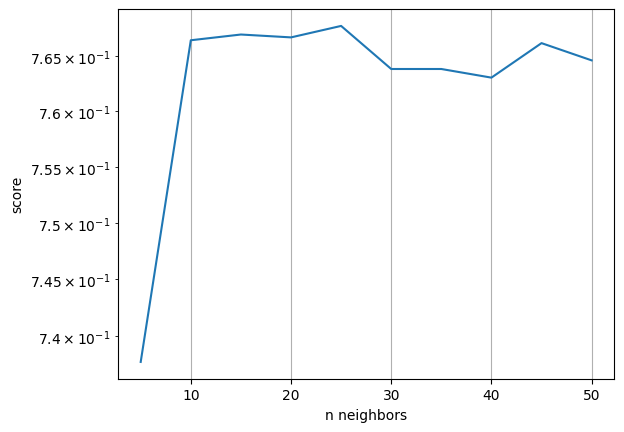

In [31]:
score = []
for i in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    score.append(knn.score(x_test, y_test))

plt.plot([5, 10, 15, 20, 25, 30, 35, 40, 45, 50], score)
plt.semilogy()
plt.xlabel('n neighbors')
plt.ylabel('score')
plt.grid()

print(f'Лучшая точность: {round((score[0]) * 100, 2)}%')

# Логистическая регрессия

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [33]:
# param_grid = [
#     {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'C' : np.logspace(-10, 10, 20),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter' : [100, 1000,2500, 5000]
#     }
# ]
# logi = LogisticRegression()
# logi_hypertuned = GridSearchCV(logi, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# res_hypertuned = logi_hypertuned.fit(x_train,y_train)

#print(best_clf.best_estimator_)

logreg = LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state = 0)
logreg.fit(x_train, y_train)
y_pred_test = logreg.predict(x_test)
print(f'Точность модели: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

Точность модели: 78.05%


In [34]:

print(f'Точность на обучающей выборке: {round(logreg.score(x_train, y_train) * 100, 2)}%')
print(f'Точность на тестовой выборке: {round(logreg.score(x_test, y_test) * 100, 2)}%')

Точность на обучающей выборке: 76.33%
Точность на тестовой выборке: 78.05%


# SVM

In [35]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [36]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}

# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# grid.fit(x_train, y_train)


svm = SVC(C=10.0, kernel='rbf', gamma=1.0)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
cm_svm = confusion_matrix(y_pred_svm, y_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Model Acc : ",acc_svm)

SVM Model Acc :  0.7573068893528184


# Случайный лес

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [43]:
# param_grid = {
#     'n_estimators': [25, 50, 100, 150],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9],
#     'max_leaf_nodes': [3, 6, 9],
# }

# grid_search = GridSearchCV(RandomForestClassifier(),
#                            param_grid=param_grid)
# grid_search.fit(x_train, y_train)
# print(grid_search.best_estimator_)

random_forest_model = RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9, n_estimators=25)
random_forest_model.fit(x_train, y_train)
y_pred_random_forest = random_forest_model.predict(x_test)
cm_random_forest = confusion_matrix(y_pred_random_forest, y_test)
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Random Forest Model Acc : ",acc_random_forest)

Random Forest Model Acc :  0.7972338204592901


In [45]:
print("Итого")
print("Testing Results")
print(f'KNN: {round((score[0]) * 100, 2)}%')
print(f'Logistic regression: {round(logreg.score(x_test, y_test) * 100, 2)}%')
print(f'SVM: {round(acc_svm*100,2)}%')
print(f'Random Forest: {round((acc_random_forest)*100, 2)}%')

Итого
Testing Results
KNN: 73.77%
Logistic regression: 78.05%
SVM: 75.73%
Random Forest: 79.72%
